In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#1. Load the datasets first
file_paths = {
    "cpasf": "Cleaned_CPASF.csv",
    "cpmnt": "Cleaned_CPMNT.csv",
    "scheme": "Cleaned_Scheme_Details.csv"
}

In [39]:
#2. Read CSV files
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [40]:
#3. Create scheme_df from dfs["scheme"]
scheme_df = dfs["scheme"]

In [41]:
#4. Print columns to verify
print("\nScheme DataFrame columns:", scheme_df.columns.tolist())


Scheme DataFrame columns: ['Scheme Start', 'Scheme End', 'Product', 'Days of Discount', 'Discount (%)', 'PROD A', 'PROD B', 'PROD C', 'PROD D', 'PROD E', 'AHMEDABAD', 'AMBALA', 'BANGALORE', 'CHANDIGARH', 'CHENNAI', 'DEHRADUN', 'DELHI', 'GHAZIABAD', 'HYDERABAD', 'KANPUR', 'KOCHI', 'KOLKATA', 'MUMBAI', 'PARWANOO', 'ZIRAKHPUR']


In [42]:
#5. Rename columns for merge
scheme_df = scheme_df.rename(columns={
    'Scheme Start': 'Date',
    'Product': 'SKU'
})

In [43]:
#6. Create Location column from encoded location columns
location_columns = ['AHMEDABAD', 'AMBALA', 'BANGALORE', 'CHANDIGARH', 'CHENNAI', 
                   'DEHRADUN', 'DELHI', 'GHAZIABAD', 'HYDERABAD', 'KANPUR',
                   'KOCHI', 'KOLKATA', 'MUMBAI', 'PARWANOO', 'ZIRAKHPUR']

In [ ]:
#7. Inspect datasets
for name, df in dfs.items():
    print(f"\nDataset: {name.upper()}\n")
    print(df.info())
    print(df.head())


Dataset: CPASF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Key                  4226 non-null   object 
 1   Date                 4226 non-null   object 
 2   Locations            4226 non-null   object 
 3   Division             4226 non-null   object 
 4   SKU                  4226 non-null   object 
 5   Sales                4226 non-null   int64  
 6   OpeningStock         4226 non-null   int64  
 7   Receipts             4226 non-null   int64  
 8   Forecast             4226 non-null   int64  
 9   SellingPrice         4226 non-null   float64
 10  NetStock             4226 non-null   int64  
 11  Lagged_Sales         4221 non-null   float64
 12  Sales_MA_3           4226 non-null   float64
 13  Sales_MA_6           4226 non-null   float64
 14  Sales_MA_12          4226 non-null   float64
 15  Agent_1              

In [45]:
#8. Ensure column names match
cpasf_cols = set(dfs["cpasf"].columns)
cpmnt_cols = set(dfs["cpmnt"].columns)
scheme_cols = set(dfs["scheme"].columns)

print("\nColumns in CPASF:", cpasf_cols)
print("Columns in CPMNT:", cpmnt_cols)
print("Columns in Scheme:", scheme_cols)



Columns in CPASF: {'Forecast', 'Agent_4', 'Location_PARWANOO', 'SKU', 'Location_ERNAKULAM', 'Location_GHAZIABAD', 'Sales_MA_3', 'Agent_5', 'OpeningStock', 'Location_DEHRADUN', 'Receipts', 'Sales_MA_12', 'Agent_2', 'Agent_3', 'Key', 'Location_CHENNAI', 'Location_CHANDIGARH', 'Location_BANGALORE', 'Date', 'Locations', 'Sales', 'Location_CALCUTTA', 'Location_KANPUR', 'SellingPrice', 'Sales_MA_6', 'Location_AHMEDABAD', 'Location_ZIRAKPUR', 'Location_DELHI', 'NetStock', 'Lagged_Sales', 'Agent_1', 'Division', 'Location_AMBALA', 'Location_HYDERABAD', 'Location_MUMBAI'}
Columns in CPMNT: {'Forecast', 'Agent_4', 'Location_PARWANOO', 'SKU', 'Location_ERNAKULAM', 'Location_GHAZIABAD', 'Sales_MA_3', 'Agent_5', 'OpeningStock', 'Location_DEHRADUN', 'Receipts', 'Sales_MA_12', 'Agent_2', 'Agent_3', 'Key', 'Location_CHENNAI', 'Location_CHANDIGARH', 'Location_BANGALORE', 'Date', 'Locations', 'Sales', 'Location_CALCUTTA', 'Location_KANPUR', 'SellingPrice', 'Sales_MA_6', 'Location_AHMEDABAD', 'Location_Z

In [46]:
#9. Merge CPASF & CPMNT (as they have similar columns)
common_cols = list(cpasf_cols.intersection(cpmnt_cols))
merged_sales = pd.concat([dfs["cpasf"][common_cols], dfs["cpmnt"][common_cols]], ignore_index=True)

In [47]:
#10. First check column names
print("Sales DataFrame columns:", merged_sales.columns.tolist())
print("\nScheme DataFrame columns:", scheme_df.columns.tolist())

Sales DataFrame columns: ['Forecast', 'Agent_4', 'Location_PARWANOO', 'SKU', 'Location_ERNAKULAM', 'Location_GHAZIABAD', 'Sales_MA_3', 'Agent_5', 'OpeningStock', 'Location_DEHRADUN', 'Receipts', 'Sales_MA_12', 'Agent_2', 'Agent_3', 'Key', 'Location_CHENNAI', 'Location_CHANDIGARH', 'Location_BANGALORE', 'Date', 'Locations', 'Sales', 'Location_CALCUTTA', 'Location_KANPUR', 'SellingPrice', 'Sales_MA_6', 'Location_AHMEDABAD', 'Location_ZIRAKPUR', 'Location_DELHI', 'NetStock', 'Lagged_Sales', 'Agent_1', 'Division', 'Location_AMBALA', 'Location_HYDERABAD', 'Location_MUMBAI']

Scheme DataFrame columns: ['Date', 'Scheme End', 'SKU', 'Days of Discount', 'Discount (%)', 'PROD A', 'PROD B', 'PROD C', 'PROD D', 'PROD E', 'AHMEDABAD', 'AMBALA', 'BANGALORE', 'CHANDIGARH', 'CHENNAI', 'DEHRADUN', 'DELHI', 'GHAZIABAD', 'HYDERABAD', 'KANPUR', 'KOCHI', 'KOLKATA', 'MUMBAI', 'PARWANOO', 'ZIRAKHPUR']


In [48]:
#11. Rename 'Locations' to 'Location' in merged_sales for consistency
merged_sales = merged_sales.rename(columns={'Locations': 'Location'})

In [49]:
#12. Create Location column in scheme_df based on the location dummy columns
location_columns = ['AHMEDABAD', 'AMBALA', 'BANGALORE', 'CHANDIGARH', 'CHENNAI', 
                   'DEHRADUN', 'DELHI', 'GHAZIABAD', 'HYDERABAD', 'KANPUR',
                   'KOCHI', 'KOLKATA', 'MUMBAI', 'PARWANOO', 'ZIRAKHPUR']

def get_location(row):
    locations = []
    for loc in location_columns:
        if row[loc] == 1:
            locations.append(loc)
    return locations[0] if locations else None

scheme_df['Location'] = scheme_df.apply(get_location, axis=1)

In [50]:
#13. Now merge with aligned column names
merged_data = pd.merge(merged_sales, scheme_df, 
                      on=['Date', 'SKU', 'Location'], 
                      how='left')

In [51]:
#14. Verify merge was successful
print("Shape of merged data:", merged_data.shape)
print("\nColumns in merged data:", merged_data.columns.tolist())

Shape of merged data: (8391, 58)

Columns in merged data: ['Forecast', 'Agent_4', 'Location_PARWANOO', 'SKU', 'Location_ERNAKULAM', 'Location_GHAZIABAD', 'Sales_MA_3', 'Agent_5', 'OpeningStock', 'Location_DEHRADUN', 'Receipts', 'Sales_MA_12', 'Agent_2', 'Agent_3', 'Key', 'Location_CHENNAI', 'Location_CHANDIGARH', 'Location_BANGALORE', 'Date', 'Location', 'Sales', 'Location_CALCUTTA', 'Location_KANPUR', 'SellingPrice', 'Sales_MA_6', 'Location_AHMEDABAD', 'Location_ZIRAKPUR', 'Location_DELHI', 'NetStock', 'Lagged_Sales', 'Agent_1', 'Division', 'Location_AMBALA', 'Location_HYDERABAD', 'Location_MUMBAI', 'Scheme End', 'Days of Discount', 'Discount (%)', 'PROD A', 'PROD B', 'PROD C', 'PROD D', 'PROD E', 'AHMEDABAD', 'AMBALA', 'BANGALORE', 'CHANDIGARH', 'CHENNAI', 'DEHRADUN', 'DELHI', 'GHAZIABAD', 'HYDERABAD', 'KANPUR', 'KOCHI', 'KOLKATA', 'MUMBAI', 'PARWANOO', 'ZIRAKHPUR']


In [52]:
#15. Save the merged dataset
merged_data.to_csv("Final_Merged_Dataset.csv", index=False)
print("\nMerged dataset saved to 'Final_Merged_Dataset.csv'")


Merged dataset saved to 'Final_Merged_Dataset.csv'


In [53]:
#16. Convert Date to datetime
merged_data["Date"] = pd.to_datetime(merged_data["Date"])

In [54]:
#17. Set visualization style
sns.set_style("whitegrid")

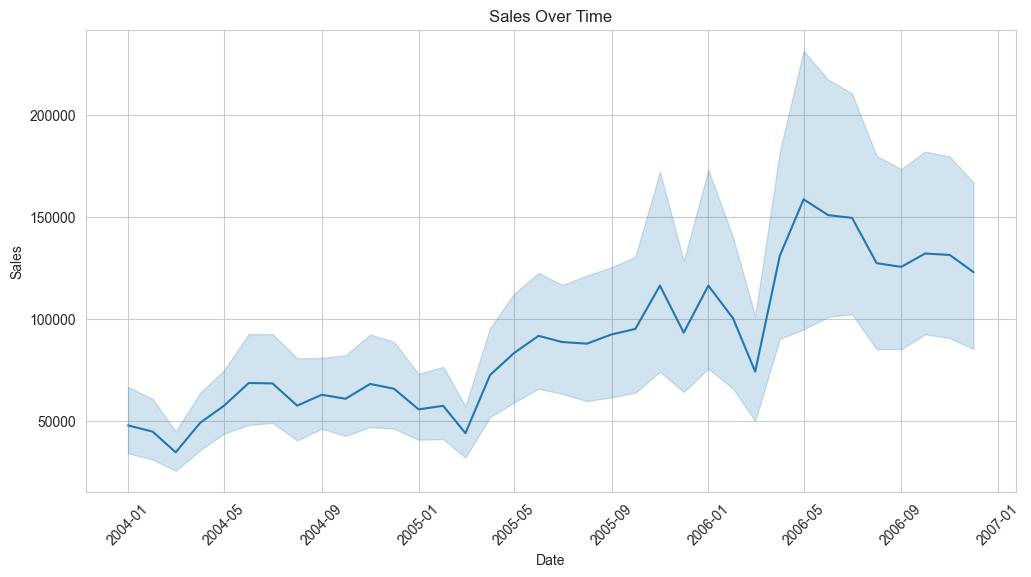

In [ ]:
#18. --- 1. Line Chart: Sales over Date ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="Date", y="Sales")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

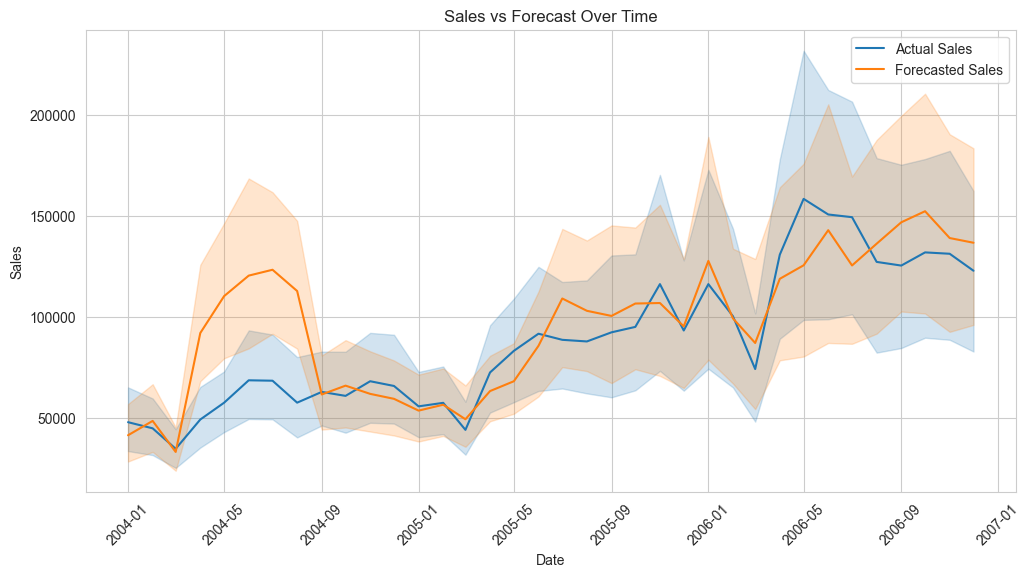

In [ ]:
#19. --- 2. Line Chart: Sales vs Forecast over Date ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="Date", y="Sales", label="Actual Sales")
sns.lineplot(data=merged_data, x="Date", y="Forecast", label="Forecasted Sales")
plt.title("Sales vs Forecast Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()

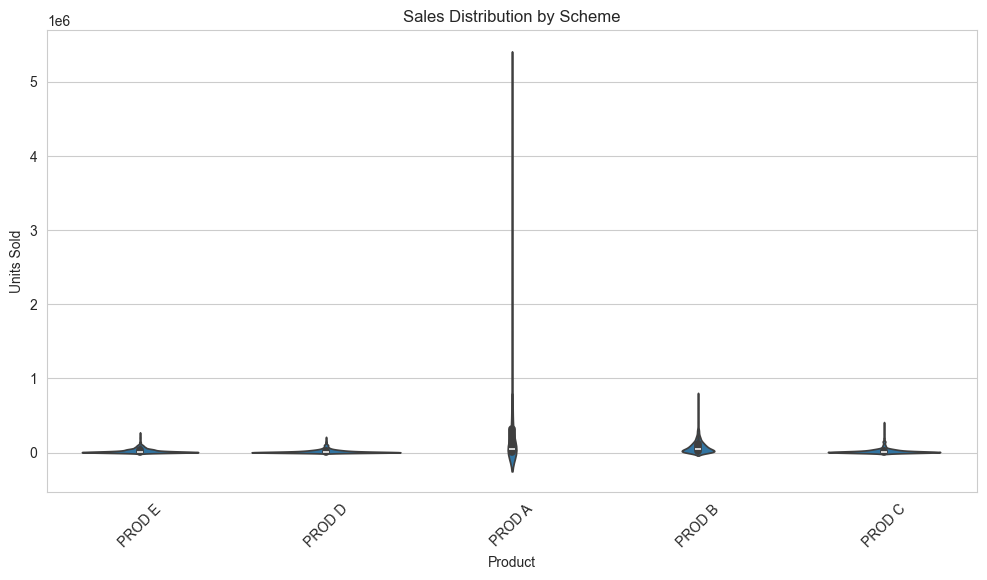

In [ ]:
#20. --- 3. Violin Plot: Sales grouped by Scheme ---
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_data, x="SKU", y="Sales")
plt.title("Sales Distribution by Scheme")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()

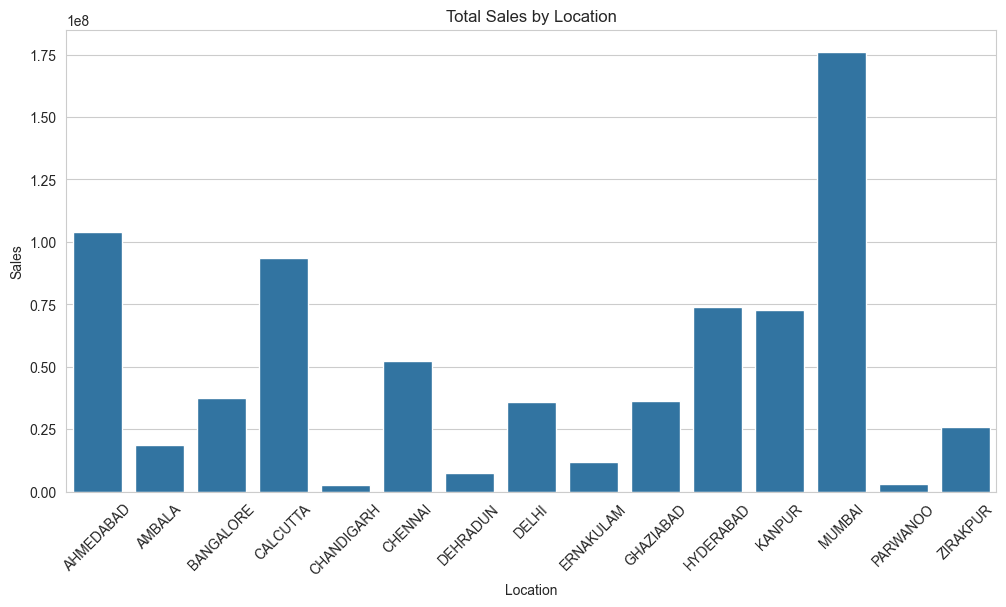

In [ ]:
#21. --- 4. Bar Chart: Sales by Location ---
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data.groupby("Location")["Sales"].sum().reset_index(), x="Location", y="Sales")
plt.title("Total Sales by Location")
plt.xticks(rotation=45)
plt.show()

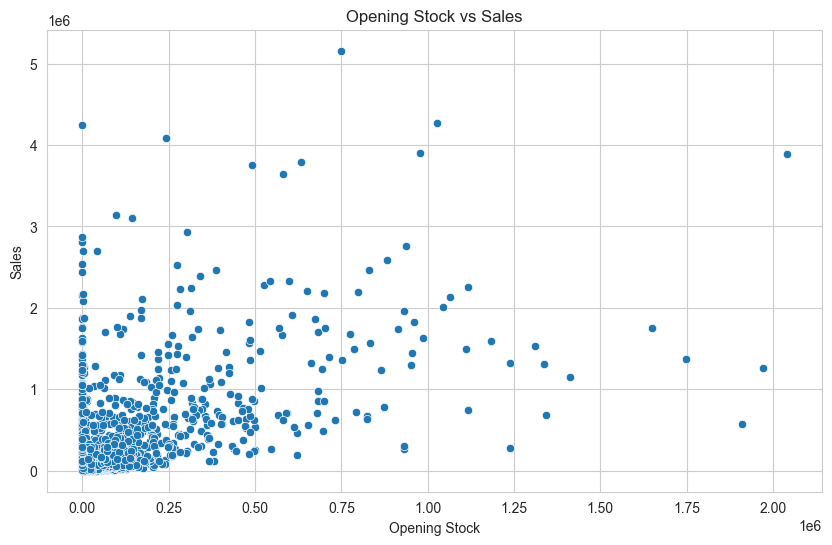

In [ ]:
#22. --- 5. Scatter Plot: OpeningStock vs Sales ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="OpeningStock", y="Sales")
plt.title("Opening Stock vs Sales")
plt.xlabel("Opening Stock")
plt.ylabel("Sales")
plt.show()

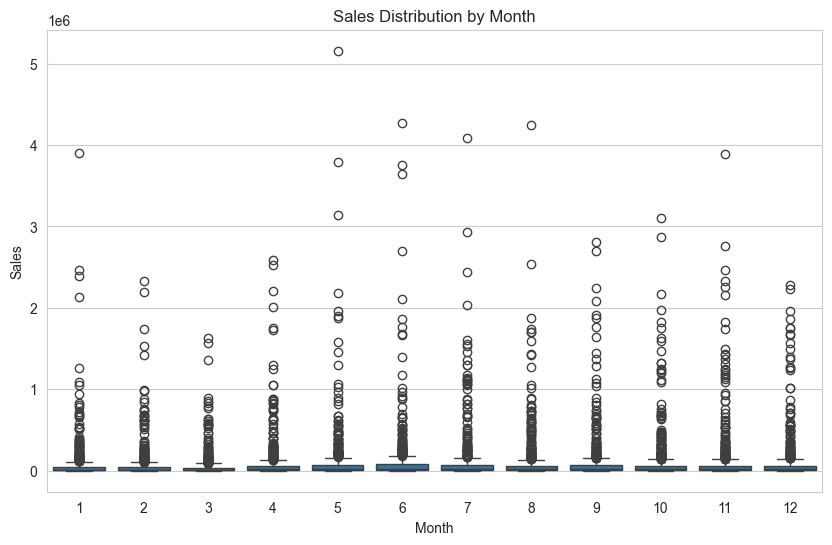

In [ ]:
#23. --- 6. Boxplot: Sales by Month ---
merged_data["Month"] = merged_data["Date"].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x="Month", y="Sales")
plt.title("Sales Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

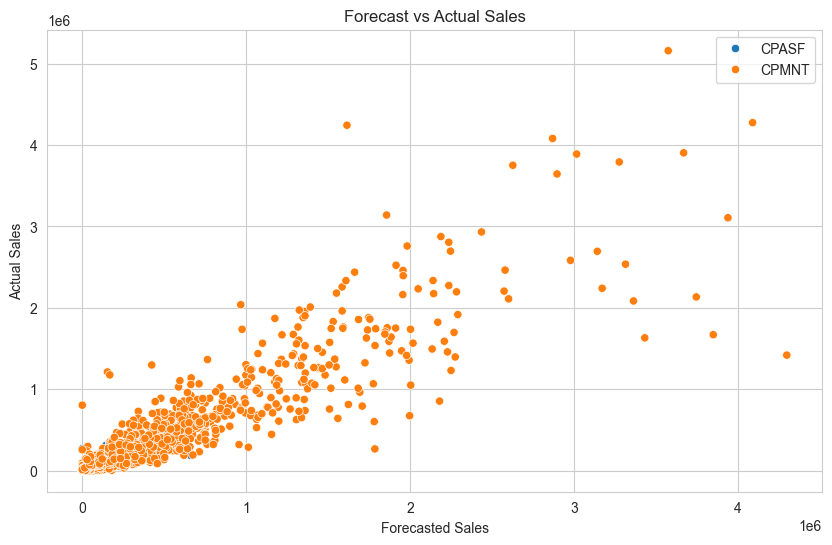

In [ ]:
#24. --- 7. Scatter Plot: Forecast vs Sales (colored by C&FAgent) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, 
                x="Forecast", 
                y="Sales", 
                hue="Division")  # Changed from 'C&FAgent' to 'Division'
plt.title("Forecast vs Actual Sales")
plt.xlabel("Forecasted Sales")
plt.ylabel("Actual Sales")
plt.legend()
plt.show()